<a href="https://colab.research.google.com/github/sapnachavan7875-lgtm/Data-Science-Learning/blob/main/AI_Powered_Campus_Placement_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import joblib

import warnings
warnings.filterwarnings('ignore')



**Load Dataset**

In [3]:
df = pd.read_csv("/content/Placement_Data_Full_Class.csv")

print("Dataset loaded successfully")

df.head()

Dataset loaded successfully


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**Basic Check**

In [4]:
df.shape

(215, 15)

In [5]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


**EDA**

In [8]:
print(df.shape)

print(df.isnull().sum())

print(df['status'].value_counts())

(215, 15)
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64
status
Placed        148
Not Placed     67
Name: count, dtype: int64


**Placement Count Graph**

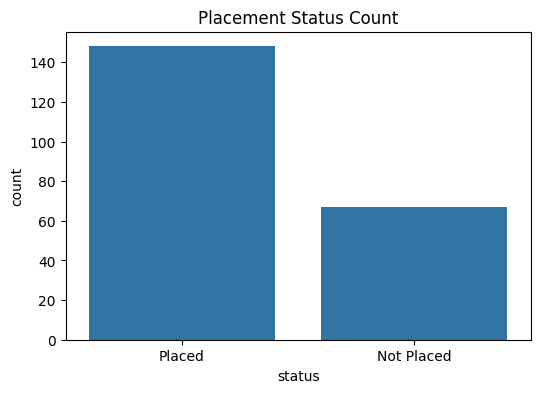

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='status', data=df)
plt.title("Placement Status Count")
plt.show()

Marks Distribution Graph**

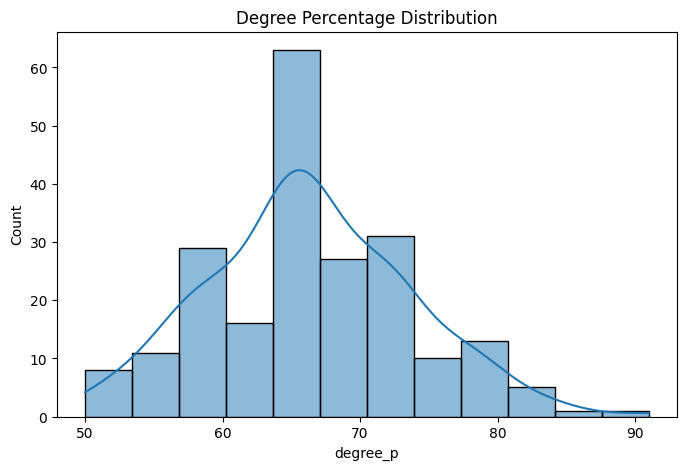

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['degree_p'], kde=True)
plt.title("Degree Percentage Distribution")
plt.show()

**Correlation Heatmap**

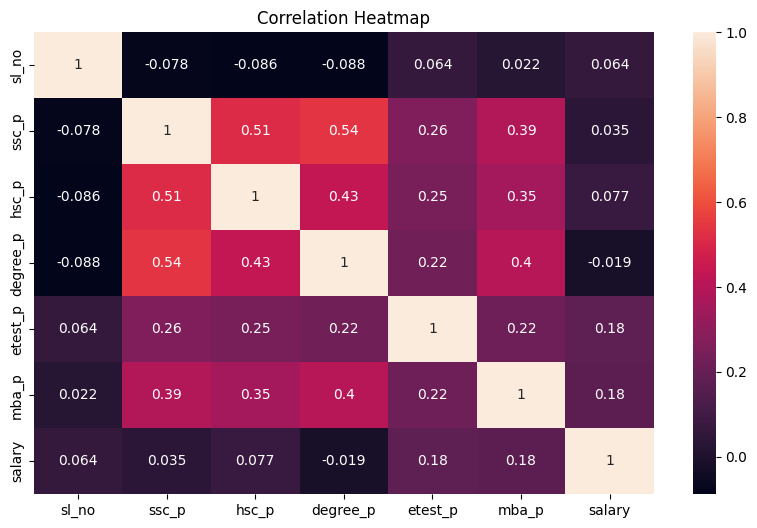

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

**Data Cleaning**

In [12]:
df = df.drop("sl_no", axis=1)

df['salary'] = df['salary'].fillna(0)

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['hsc_s'] = le.fit_transform(df['hsc_s'])
df['degree_t'] = le.fit_transform(df['degree_t'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])
df['status'] = le.fit_transform(df['status'])

print("Data cleaning and encoding done")

df.head()

Data cleaning and encoding done


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


**Check**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    int64  
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    int64  
 5   hsc_s           215 non-null    int64  
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    int64  
 8   workex          215 non-null    int64  
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    int64  
 11  mba_p           215 non-null    float64
 12  status          215 non-null    int64  
 13  salary          215 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 23.6 KB


**Feature Selection Code**

In [14]:
X = df.drop("status", axis=1)

y = df["status"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (215, 13)
Target shape: (215,)


**Check Features**

In [15]:
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,425000.0


In [16]:
y.head()

,status
0,1
1,1
2,1
3,0
4,1


Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (172, 13)
Testing data shape: (43, 13)


**Check**

In [18]:
X_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
93,1,52.0,0,62.0,0,1,54.0,0,0,72.00,1,55.41,0.0
84,1,70.0,0,63.0,1,2,70.0,2,1,55.00,0,62.00,300000.0
95,1,73.0,0,78.0,1,1,65.0,0,1,95.46,0,62.16,420000.0
137,1,67.0,1,63.0,0,1,72.0,0,0,56.00,1,60.41,225000.0
210,1,80.6,1,82.0,1,1,77.6,0,0,91.00,0,74.49,400000.0


**Feature Scaling**

In [19]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature scaling completed")


Feature scaling completed


**checK**

In [20]:
X_train[:5]

array([[ 0.72258141, -1.39473047, -0.96570403, -0.35425688, -1.31535498,
        -0.57712925, -1.60185427, -0.66604668, -0.70402569, -0.05132613,
         1.13724814, -1.15170167, -1.26555277],
       [ 0.72258141,  0.26292848, -0.96570403, -0.26697149,  0.76025104,
         1.10534925,  0.51788903,  1.60246874,  1.42040271, -1.32641199,
        -0.87931557, -0.03847026,  0.65963953],
       [ 0.72258141,  0.53920498, -0.96570403,  1.04230932,  0.76025104,
        -0.57712925, -0.14453075, -0.66604668,  1.42040271,  1.70829235,
        -0.87931557, -0.01144188,  1.42971645],
       [ 0.72258141, -0.01334801,  1.03551396, -0.26697149, -1.31535498,
        -0.57712925,  0.78285694, -0.66604668, -0.70402569, -1.25140694,
         1.13724814, -0.30706479,  0.17834146],
       [ 0.72258141,  1.23910542,  1.03551396,  1.39145088,  0.76025104,
        -0.57712925,  1.52476709, -0.66604668, -0.70402569,  1.37376983,
        -0.87931557,  2.07143267,  1.3013703 ]])

**Model Training**

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 1.0


In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

print("Decision Tree Accuracy:", dt_acc)

Decision Tree Accuracy: 1.0


In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 1.0


In [24]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)

print("XGBoost Accuracy:", xgb_acc)

XGBoost Accuracy: 1.0


**Accuracy Graph**

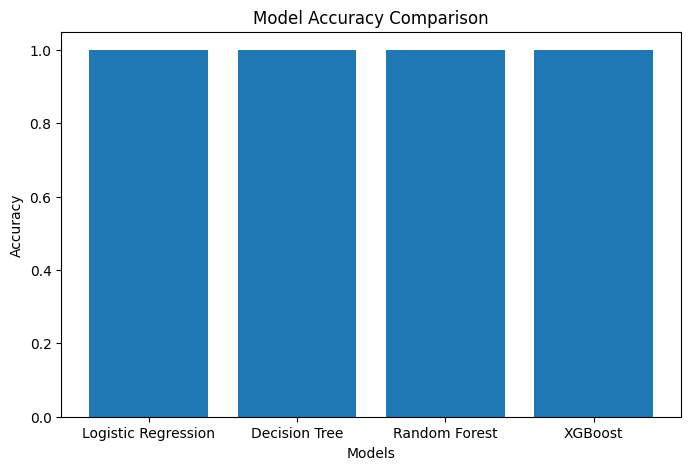

In [25]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [lr_acc, dt_acc, rf_acc, xgb_acc]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

**Exact Value**

In [26]:
for model, acc in zip(models, accuracies):
    print(model, ":", acc)

Logistic Regression : 1.0
Decision Tree : 1.0
Random Forest : 1.0
XGBoost : 1.0


**ModelSave**

In [27]:
joblib.dump(rf, "placement_model.pkl")

print("Model saved successfully")

Model saved successfully


**Scaler Model Save**

In [28]:
joblib.dump(scaler, "scaler.pkl")

print("Scaler saved successfully")

Scaler saved successfully


**Check Save or Not**

In [29]:
import os
print(os.listdir())

['.config', 'scaler.pkl', 'Placement_Data_Full_Class.csv', 'placement_model.pkl', 'sample_data']


**Prediction**

In [30]:
model = joblib.load("placement_model.pkl")
scaler = joblib.load("scaler.pkl")

sample = [[
    1,
    85,
    1,
    78,
    1,
    2,
    82,
    1,
    1,
    75,
    1,
    80,
    500000
]]

sample = scaler.transform(sample)

prediction = model.predict(sample)

if prediction[0] == 1:
    print("Student will be PLACED")
else:
    print("Student will NOT be placed")

Student will be PLACED


**Streamlit App.py**

In [31]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.0 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.1
    Uninstalling cachetools-7.0.1:
      Successfully uninstalled cachetools-7.0.1


In [32]:
!pip install streamlit pyngrok

In [33]:
!pip install gradio joblib numpy --quiet

In [34]:
import gradio as gr
import numpy as np
import joblib

model = joblib.load("placement_model.pkl")
scaler = joblib.load("scaler.pkl")

def predict(gender, ssc_p, hsc_p, degree_p, mba_p, etest_p, workex):

    gender = 1 if gender == "Male" else 0
    workex = 1 if workex == "Yes" else 0

    data = np.array([[gender, ssc_p, 1, hsc_p, 1, 1,
                      degree_p, 1, workex, etest_p,
                      1, mba_p, 0]])

    data = scaler.transform(data)

    prediction = model.predict(data)

    if prediction[0] == 1:
        return "Student will be PLACED"
    else:
        return "Student will NOT be placed"

interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Dropdown(["Male", "Female"], label="Gender"),
        gr.Number(label="SSC %"),
        gr.Number(label="HSC %"),
        gr.Number(label="Degree %"),
        gr.Number(label="MBA %"),
        gr.Number(label="Employability Test %"),
        gr.Dropdown(["Yes", "No"], label="Work Experience")
    ],
    outputs="text",
    title="AI Campus Placement Prediction System"
)

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2fbaa2649dd6d21c50.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [35]:
import gradio as gr
import numpy as np
import joblib

model = joblib.load("placement_model.pkl")
scaler = joblib.load("scaler.pkl")

def predict(gender, ssc_p, hsc_p, degree_p, mba_p, etest_p, workex):

    gender = 1 if gender == "Male" else 0
    workex = 1 if workex == "Yes" else 0

    data = np.array([[gender, ssc_p, 1, hsc_p, 1, 1,
                      degree_p, 1, workex, etest_p,
                      1, mba_p, 0]])

    data = scaler.transform(data)

    prediction = model.predict(data)

    if prediction[0] == 1:
        return "Student will be PLACED"
    else:
        return "Student will NOT be placed"

interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Dropdown(["Male", "Female"], value="Male", label="Gender"),
        gr.Number(value=75, label="SSC Percentage"),
        gr.Number(value=70, label="HSC Percentage"),
        gr.Number(value=72, label="Degree Percentage"),
        gr.Number(value=68, label="MBA Percentage"),
        gr.Number(value=65, label="Employability Test Percentage"),
        gr.Dropdown(["Yes", "No"], value="No", label="Work Experience")
    ],
    outputs="text",
    title="AI Campus Placement Prediction System"
)

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://32bf4e64e17bc26875.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
